<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [190]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import psycopg2
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import urllib.parse as req
from PIL import Image 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [192]:
connection = psycopg2.connect(
    dbname = DBNAME,
    user = USER,
    host = HOST,
    password = PASSWORD,
    port = PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [193]:
# текст запроса
query_3_1 = f'''
            SELECT COUNT(*) "Количество вакансий"
            FROM public.vacancies
            '''

In [194]:
# результат запроса
total_vacancies = pd.read_sql_query(query_3_1, connection)
total_vacancies

<ipython-input-194-10214a443ef9>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Количество вакансий
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [195]:
# текст запроса
query_3_2 = f'''
            SELECT COUNT(*) "Количество работодателей"
            FROM public.employers
            '''

In [196]:
# результат запроса
total_employers = pd.read_sql_query(query_3_2, connection)
total_employers

<ipython-input-196-23a387e442b6>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Количество работодателей
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [197]:
# текст запроса
query_3_3 = f'''
            SELECT COUNT(*) "Количество регионов"
            FROM public.areas
            '''

In [198]:
# результат запроса
total_areas = pd.read_sql_query(query_3_3, connection)
total_areas

<ipython-input-198-ceac30c54e10>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Количество регионов
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [199]:
# текст запроса
query_3_4 = f'''
            SELECT COUNT(industries) "Количество сфер деятельности"
            FROM public.industries
            '''

In [200]:
# результат запроса
total_industries = pd.read_sql_query(query_3_4, connection)
total_industries

<ipython-input-200-15f6bd644315>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Количество сфер деятельности
0,294


***

**Выводы по предварительному анализу данных:**

*   В базе содержится более 49 тысяч вакансий.
*   Общее количество работодателей - более 23 тысяч, которые представлены в 294 сферах деятельности.
*   Количество регионов более 1300.


# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [201]:
# текст запроса
query_4_1 = f'''
            SELECT
                COUNT(v.id) cnt, 
                a.name areas
            FROM public.vacancies v
            JOIN public.areas a on v.area_id = a.id
            GROUP BY areas
            ORDER BY count(v.id) desc
            '''

In [202]:
# результат запроса
area_vacancies = pd.read_sql_query(query_4_1, connection)
display(area_vacancies)

<ipython-input-202-5bf9aeb7cb4d>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,cnt,areas
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Тарко-Сале
765,1,Новоаннинский
766,1,Бирск
767,1,Сасово


In [203]:
# Пятерка лидеров по количеству вакансий:
area_vacancies.head()

,cnt,areas
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [204]:
# текст запроса
query_4_2 = f'''
            SELECT COUNT(id) "Количество вакансий с зарплатой"
            FROM public.vacancies
            WHERE salary_from IS NOT NULL 
                OR salary_to IS NOT NULL 
            '''

In [205]:
# результат запроса
salary_not_null = pd.read_sql_query(query_4_2, connection)
salary_not_null

<ipython-input-205-6626355c0dec>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Количество вакансий с зарплатой
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [206]:
# текст запроса
query_4_3 = f'''
            SELECT
                ROUND(AVG(salary_from)) avg_salary_from,
                ROUND(AVG(salary_to)) avg_salary_to
            FROM public.vacancies
            '''

In [207]:
# результат запроса
salary_mean = pd.read_sql_query(query_4_3, connection)
salary_mean

<ipython-input-207-9864603e741f>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [208]:
# текст запроса
query_4_4 = f'''
            SELECT
                schedule,
                employment,
                COUNT(id) vacancies_num
            FROM public.vacancies
            GROUP BY schedule, employment
            ORDER BY count(id) desc
            '''

In [209]:
# результат запроса
vacancies = pd.read_sql_query(query_4_4, connection)
vacancies

<ipython-input-209-3d9ab3c0ab8e>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,schedule,employment,vacancies_num
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [210]:
# текст запроса
query_4_5 = f'''
            SELECT 
                experience, 
                COUNT(id) vacancies_num
            FROM public.vacancies
            GROUP BY experience
            ORDER BY count(id) asc
            '''

In [211]:
# результат запроса
experience = pd.read_sql_query(query_4_5, connection)
experience

<ipython-input-211-049ad7da00ee>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,vacancies_num
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

**Выводы по детальному анализу вакансий:**

*   Лидеры по количеству вакансий - крупнейшие города России, Беларуси, Казахстана.
*   Примерно у половины представленных вакансий не указан размер заработной платы. Возможно, он будет определен по результатам собеседования, что свидетельствует о гибком подходе работодателя к каждому работнику, с учётом его профессиональных качеств и опыта работы.
*   У подавляющего большинства представленных вакансий тип рабочего графика работы и вид трудоустройства - полный день/полная занятость, на втором месте с большим отрывом - удалённая работа/полная занятость.
*   У 52% вакансий указан требуемый опыт работы от 1 года до 3 лет. Компании заинтересованы иметь в своем штате работников, имеющих минимальный опыт работы. Сотрудник с опытом от 1 до 3 лет очень привлекателен для работодателя. Такой работник самостоятелен, он уже знаком с работой, сможет качественно выполнять свои функции. Работодателю не придется тратить дополнительные средства на его обучение и подготовку, и, одновременно с этим, затраты на заработную плату таких работников будут ниже чем для специалистов с большим опытом работы.







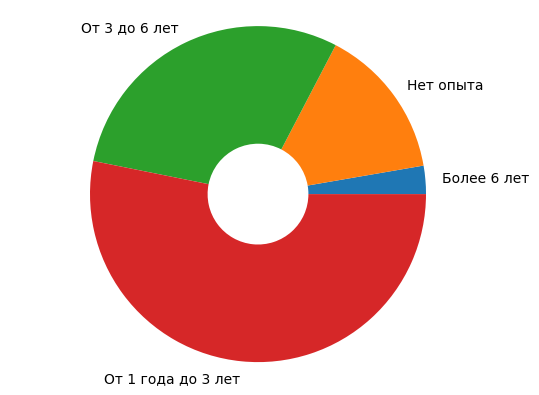

In [212]:
# круговая диаграмма по признаку 'experience'
values = experience['vacancies_num']
fig, ax = plt.subplots()
ax.pie(values, labels = experience['experience'], wedgeprops = dict(width = 0.7));
ax.axis('equal');

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [213]:
# текст запроса
query_5_1 = f'''
            SELECT
                e.name employer_name,
                COUNT(v.id) cnt_vacancies
            FROM public.vacancies v
            JOIN public.employers e ON e.id = v.employer_id
            GROUP BY e.name
            ORDER BY COUNT(v.id) DESC
            LIMIT 5
            '''

In [214]:
# результат запроса
employers = pd.read_sql_query(query_5_1, connection)
employers

<ipython-input-214-c9a0b95699ca>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employer_name,cnt_vacancies
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [215]:
# текст запроса
query_5_2 = f'''
            SELECT a.name area_name,
            COUNT(distinct e.id) employers_num,
            COUNT(distinct v.id) vacancies_num
            FROM areas a
            LEFT JOIN employers e ON a.id = e.area
            LEFT JOIN vacancies v ON v.area_id = a.id
            WHERE v.id is null
            GROUP BY a.name
            ORDER BY employers_num DESC, vacancies_num ASC
            '''

In [216]:
# результат запроса
employers_vacancies = pd.read_sql_query(query_5_2, connection)
employers_vacancies

<ipython-input-216-f9e20a7de2b8>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,area_name,employers_num,vacancies_num
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [217]:
# текст запроса
query_5_3 = f'''
            SELECT
            employer_id,
            COUNT(DISTINCT area_id) areas_num
            FROM public.vacancies
            GROUP BY employer_id
            ORDER BY COUNT(DISTINCT area_id) DESC
            '''

In [218]:
# результат запроса
employer_regions = pd.read_sql_query(query_5_3, connection)
employer_regions

<ipython-input-218-a072a3ea25b2>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employer_id,areas_num
0,1740,181
1,2748,152
2,5724811,116
3,5130287,88
4,3682876,71
...,...,...
14901,810278,1
14902,810313,1
14903,810551,1
14904,810688,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [219]:
# текст запроса
query_5_4 = f'''
            SELECT COUNT(*) employers_num
            FROM public.employers e
            LEFT JOIN public.employers_industries i ON e.id = i.employer_id
            WHERE i.industry_id IS NULL 
            '''

In [220]:
# результат запроса
industry_null = pd.read_sql_query(query_5_4, connection)
industry_null

<ipython-input-220-edefe383c699>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employers_num
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [221]:
# текст запроса
query_5_5 = f'''
            SELECT e.name employer_name
            FROM public.employers e
            LEFT JOIN public.employers_industries i ON e.id = i.employer_id
            GROUP BY e.name
            HAVING COUNT(i.industry_id) = 4
            ORDER BY e.name
            OFFSET 2 LIMIT 1
            '''

In [222]:
# результат запроса
third_place = pd.read_sql_query(query_5_5, connection)
third_place

<ipython-input-222-b32c3430f451>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employer_name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [223]:
# текст запроса
query_5_6 = f'''
            SELECT COUNT(*) employers_num
            FROM public.industries i
            LEFT JOIN public.employers_industries ei ON i.id = ei.industry_id
            WHERE i.name = 'Разработка программного обеспечения'
            '''

In [224]:
# результат запроса
sw_industry = pd.read_sql_query(query_5_6, connection)
sw_industry

<ipython-input-224-3e12b7b23dcb>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employers_num
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [225]:
# код для получения списка городов-милионников
path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров') 
url = path_common.scheme + '://' + req.quote(path_common.netloc) + req.quote(path_common.path) + '#' + req.quote(path_common.fragment)
df = pd.read_html(url)[1]
towns_mill = tuple(df['Город'])
towns_mill

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [226]:
# текст запроса
query_5_7 = f'''
            SELECT 
                a.name city_name,
                COUNT(v.id) yandex_vacancies_num
            FROM public.areas a
            JOIN public.vacancies v ON a.id = v.area_id
            JOIN public.employers e ON e.id = v.employer_id
            WHERE a.name IN {towns_mill} 

                AND e.name = 'Яндекс'
            GROUP BY a.name
            UNION ALL
            SELECT
                'Total',
                COUNT(v.id)
            FROM public.areas a
            JOIN public.vacancies v ON a.id = v.area_id
            JOIN public.employers e ON e.id = v.employer_id
            WHERE a.name IN {towns_mill}
 
                AND e.name = 'Яндекс'
                ORDER BY yandex_vacancies_num
            '''

In [227]:
# результат запроса
yandex = pd.read_sql_query(query_5_7, connection)
yandex

<ipython-input-227-cc592546fd28>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,city_name,yandex_vacancies_num
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

**Выводы по анализу работодателей:**

*   Компании-лидеры по количеству вакансий представлены в сферах ИТ и банковских услуг.
*   Некоторые компании публикуют свои вакансии сразу в нескольких десятках регионов, что свидетельствует об обширной сети их деятельности. Они могут иметь представительства во многих городах и постоянно развиваться.
*   Работодатели указывают до 5 сфер деятельности у своих компаний, при этом у 8419 компаний сфера деятельности не указана.
*   В качестве сферы деятельности у 3553 работодателей указана «Разработка программного обеспечения».
*   У компании «Яндекс» суммарно в городах-миллионниках РФ размещены 485 вакансий. Крупнейшая IT-компания, возможно, развивает новое направление деятельности, открывает новые офисы, разрабатывает новые продукты. Возможно это связано со сменой руководства компании и массовым оттоком сотрудников.


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [228]:
# текст запроса
query_6_1 = f'''
            SELECT COUNT(*) data_vacancies_num
            FROM public.vacancies
            WHERE name ILIKE '%data%'
                OR name ILIKE '%данн%'
            '''

In [229]:
# результат запроса
data = pd.read_sql_query(query_6_1, connection)
data

<ipython-input-229-4107b9abe5fd>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,data_vacancies_num
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [230]:
# текст запроса
query_6_2 = f'''
            SELECT COUNT(*) ds_vacancies_num
            FROM public.vacancies
            WHERE (name ILIKE '%data scientist%'
                OR name ILIKE '%data science%'
                OR name ILIKE '%исследователь данных%'
                OR (name LIKE '%ML%' AND name NOT LIKE'%HTML%')
                OR name ILIKE '%machine learning%'
                OR name ILIKE '%машинн%обучен%')
                AND (name ILIKE '%junior%'
                OR experience = 'Нет опыта'
                OR employment = 'Стажировка')
            '''

In [231]:
# результат запроса
ds = pd.read_sql_query(query_6_2, connection)
ds

<ipython-input-231-01ad244b9072>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,ds_vacancies_num
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [232]:
# текст запроса
query_6_3 = f'''
            SELECT COUNT(*) ds_sql_vacancies_num
            FROM public.vacancies
            WHERE (name ILIKE '%data scientist%'
                OR name ILIKE '%data science%'
                OR name ILIKE '%исследователь данных%'
                OR (name LIKE '%ML%' AND name NOT LIKE'%HTML%')
                OR name ILIKE '%machine learning%'
                OR name ILIKE '%машинн%обучен%')
                AND (key_skills ILIKE '%SQL%'
                OR key_skills ILIKE '%postgres%')
            '''

In [233]:
# результат запроса
ds_sql = pd.read_sql_query(query_6_3, connection)
ds_sql

<ipython-input-233-0b4f8df79791>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,ds_sql_vacancies_num
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [234]:
# текст запроса
query_6_4 = f'''
            SELECT COUNT(*) ds_py_vacancies_num
            FROM public.vacancies
            WHERE (name ILIKE '%data scientist%'
                OR name ILIKE '%data science%'
                OR name ILIKE '%исследователь данных%'
                OR (name LIKE '%ML%' AND name NOT LIKE'%HTML%')
                OR name ILIKE '%machine learning%'
                OR name ILIKE '%машинн%обучен%')
                AND key_skills ILIKE '%Python%'
            '''

In [235]:
# результат запроса
ds_py = pd.read_sql_query(query_6_4, connection)
ds_py

<ipython-input-235-8cb467353777>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,ds_py_vacancies_num
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [236]:
# текст запроса
query_6_5 = f'''
            SELECT ROUND(AVG(1+ LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), ''))), 2) avg_ds_skills
            FROM public.vacancies
            WHERE (name ILIKE '%data scientist%'
                OR name ILIKE '%data science%'
                OR name ILIKE '%исследователь данных%'
                OR (name LIKE '%ML%' AND name NOT LIKE'%HTML%')
                OR name ILIKE '%machine learning%'
                OR name ILIKE '%машинн%обучен%')
                AND key_skills IS NOT NULL
            '''

In [237]:
# результат запроса
key_skills_ds = pd.read_sql_query(query_6_5, connection)
key_skills_ds

<ipython-input-237-c0d2dfd08ce0>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,avg_ds_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [238]:
# текст запроса
query_6_6 = f'''
            SELECT experience,
                ROUND(AVG(COALESCE((salary_from + salary_to)/2, salary_to, salary_from))) avg_salary                
            FROM public.vacancies
            WHERE (name ILIKE '%data scientist%'
                OR name ILIKE '%data science%'
                OR name ILIKE '%исследователь данных%'
                OR (name LIKE '%ML%' AND name NOT LIKE'%HTML%')
                OR name ILIKE '%machine learning%'
                OR name ILIKE '%машинн%обучен%')
                AND (salary_to IS NOT NULL OR salary_from IS NOT NULL)
            GROUP BY experience
            '''

In [239]:
# результат запроса
salary_ds = pd.read_sql_query(query_6_6, connection)
salary_ds

<ipython-input-239-041c9eb928b6>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

**Выводы по предметному анализу:**

*   1771 вакансия имеет отношение к сфере работы с данными.
*   Для начинающего Data Scientist в базе можно найти 51 вакансию.
*   Требования знаний SQL или Postgre для Data Scientist имеются в 201 вакансии. Чаще встречаются требования к навыкам владения Python - в 351 вакансии, т.к. Python удобный, понятный, популярный язык программирования и основа для дата-саентиста.
*   Среднее количество навыков в одной вакансии для Data Scientist более 6. Для Data Scientist недостаточно владеть одним инструментом. Для успешной работы необходимы базовые знания в разных направлениях DS.
*   Средняя зарплата Data Scientist в зависимости от опыта работы находится в диапазоне 75-243 тыс.рублей.


# Общий вывод по проекту

**Итог исследования**

По результатам исследования базы данных с вакансиями можно сделать следующие выводы:

*   Большинство вакансий встречается в крупных городах, где находится большое количество различных компаний.
*   ТОП-5 популярных вакансий: Системный администратор, Программист 1С, Бизнес-аналитик, Специалист технической поддержки, Системный аналитик. Это свидетельствует о востребованности IT специалистов на рынке труда.
*   Чаще других вакансии размещают работодатели, у которых указаны сферы деятельности: «Разработка программного обеспечения» «Системная интеграция. IT-консалтинг», «Интернет-компания».
*   Основная масса всех вакансий это: регион - крупный город, тип рабочего графика и трудоустройства - полная занятость/полный рабочий день, опыт работы - от 1 года до 3 лет.
*   Примерно в половине случаев работодатель не указывает уровень заработной платы. Вероятнее всего, это будет определяться по результатам собеседования.
*   Для начинающего специалиста по Data Science есть возможность выбора из 51 вакансии.
*   Начинающий Data Scientist, желающий найти удаленную работу, должен иметь опыт не менее 1 года. Он может рассчитывать на зарплату от 75 000 рублей.

В качестве продолжения исследования было бы интересно выяснить средний уровень зарплаты в разрезе регионов и сфер деятельнсти/компаний.


7. Дополнительно узнаем минимальный и максимальный уровень зарплаты для Data Scientist с типом рабочего графика «Удаленная работа». 

In [240]:
# текст запроса
query_7 = f'''
            SELECT experience,
            ROUND(MIN(COALESCE((salary_from + salary_to)/2, salary_to, salary_from))) min_salary,
            ROUND(MAX(COALESCE((salary_from + salary_to)/2, salary_to, salary_from))) max_salary                    
            FROM public.vacancies
            WHERE (name ILIKE '%data scientist%'
                OR name ILIKE '%data science%'
                OR name ILIKE '%исследователь данных%'
                OR (name LIKE '%ML%' AND name NOT LIKE'%HTML%')
                OR name ILIKE '%machine learning%'
                OR name ILIKE '%машинн%обучен%')
                AND (salary_to IS NOT NULL OR salary_from IS NOT NULL)
                AND schedule = 'Удаленная работа'
            GROUP BY experience
            '''

In [241]:
# результат запроса
ds_salary_remote = pd.read_sql_query(query_7, connection)
ds_salary_remote

<ipython-input-241-766f519bf1b4>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,experience,min_salary,max_salary
0,От 1 года до 3 лет,75000.0,275000.0
1,От 3 до 6 лет,119000.0,300000.0


8. Дополнительно определим какие сферы деятельности чаще всего работодатели указывают в своих вакансиях.

In [242]:
# текст запроса
query_8 = f'''
            SELECT i.name industry_name,
                COUNT(v.id) cnt_vacancies
            FROM public.industries i
            JOIN public.employers_industries ei ON i.id = ei.industry_id
            JOIN public.employers e ON e.id = ei.employer_id
            JOIN public.vacancies v ON e.id = v.employer_id
            GROUP BY i.name
            ORDER BY cnt_vacancies DESC
            '''

In [243]:
# результат запроса
industries = pd.read_sql_query(query_8, connection)
industries

<ipython-input-243-ccab6526a6dd>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,industry_name,cnt_vacancies
0,Разработка программного обеспечения,12499
1,"Системная интеграция, автоматизации технологи...",11034
2,"Интернет-компания (поисковики, платежные систе...",6413
3,Банк,2742
4,Мобильная связь,1585
...,...,...
288,Спортивная федерация,5
289,Химчистка,4
290,"Ассоциация в сфере культуры, искусства",2
291,Автошкола,1


In [244]:
# построим график
fig = px.treemap(
    data_frame=industries, 
    path=['industry_name'], 
    values='cnt_vacancies', 
    height=800, 
    width=1200, 
    title='Сферы деятельности работодателей, указанные в вакансиях' #заголовок
)

# отображаем график
fig.show()

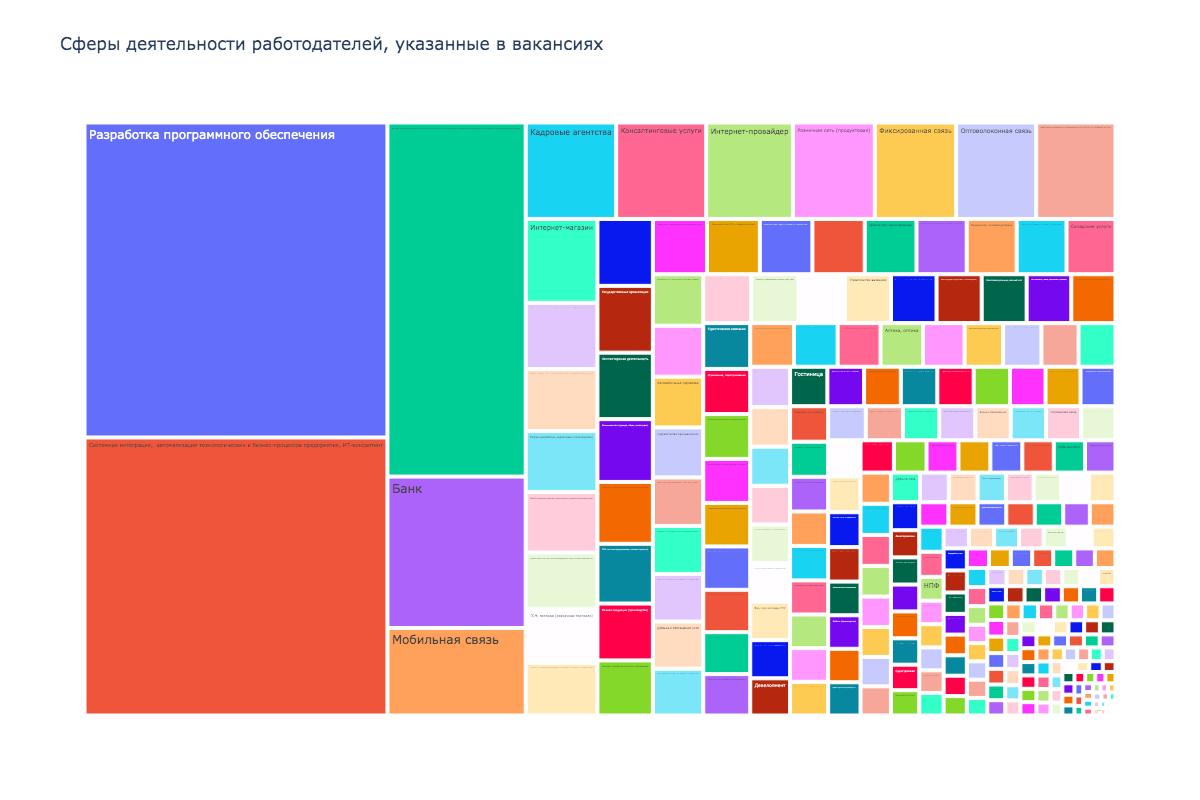

In [245]:
img = Image.open('/content/drive/MyDrive/SkillFactory/plots2/newplot.png') 
img.show()

9. Определим ТОП-5 популярных вакансий

In [246]:
# текст запроса
query_9 = f'''
            SELECT name vacancies_name,
                COUNT(id) cnt_vacancies
            FROM public.vacancies
            GROUP BY name
            ORDER BY cnt_vacancies DESC
            LIMIT 5
            '''

In [247]:
# результат запроса
top_vacancies = pd.read_sql_query(query_9, connection)
top_vacancies

<ipython-input-247-c041a7be97b7>:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,vacancies_name,cnt_vacancies
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432


In [248]:
# закрываем подключение
connection.close()